In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [13]:
#Number of colums(features)
K = 5
#Number of records
N = 1000
#Generate an NXK matrix of uniform random variables
X = np.random.random([N,K])

In [15]:
X[100, :]

array([0.83465565, 0.89293635, 0.89433333, 0.00638391, 0.96680634])

In [14]:
X.shape

(1000, 5)

In [17]:
#generate a random set of weights to represent beta
beta = 2*(np.random.random(K) - 0.5)
beta

array([-0.97731073, -0.55419083,  0.85847542,  0.43479062, -0.47445037])

In [18]:
#Question:we designed the above beta vector such that E[beta]=0. How can we confirm that we did this correctly?
beta.mean()

-0.14253718039203522

In [24]:
#It is likely the above is not equal to zero. Let's simulate this 100k times and see what the average mean is
sims = 100000
means = []
for i in range(sims):
    means.append(2*(np.random.random(K) - 0.5).mean())

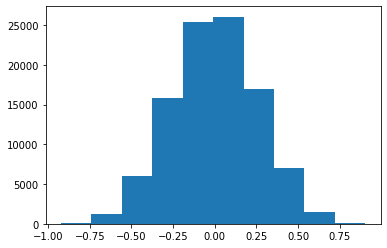

In [25]:
#let's use matplotlibs hist function to plot the histogram of means here.
plt.hist(means)
plt.show()

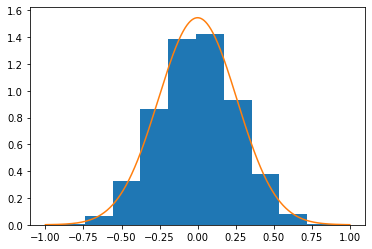

In [29]:
#Compute a vector from the normal distribution specified above
from scipy.stats import norm
mu=0
sig = np.sqrt(4/60.0)
xs = np.linspace(-1,1,1000)
ys = norm.pdf(xs , mu , sig)

plt.hist(means, density = True)
plt.plot(xs,ys)
plt.show()

In [30]:
ex_array= np.array([-1,1])
np.abs(ex_array)

array([1, 1])

In [41]:
def socre_logistic_regression(X, beta):   
    '''
    This function takes in an NxK matrix X and 1xK vector beta.
    The function should apply the logistic scoring function to each record of X.
    The output should be an Nx1 vector of scores
    '''
     #First let's calculate X*beta - make sure to use numpy's 'dot' method  
    xbeta = X.dot(beta)
    #Now let's input this into the link function
    prob_score = 1/ (1+np.exp(-1 * xbeta))
    return  prob_score 
  

In [49]:
def score_logistic_regression_NoNumpy(X, beta) :
     '''
    This function takes in an NxK matrix X and 1xK vector beta.
    The function should apply the logistic scoring function to each record of X.
    The output should be an Nx1 vector of scores
    '''
    #Let's calculate xbeta using loops
    xbeta = []
    for row in X:
        
        xb = 0
        for i, el in enumerate(row):
            xb += el * beta[i]
            
        xbeta.append(xb)
        
    #Now let's apply the link function to each xbeta
    prob_score = []
    for xb in xbeta:
        prob_score.append(1 / (1 + np.exp(-1 * xb)))
    
    return prob_score
 #Me:result: I don't know my mistake_part

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 8)

In [50]:
def score_logistic_regression_NoNumpy(X, beta):
    '''
    This function takes in an NxK matrix X and 1xK vector beta.
    The function should apply the logistic scoring function to each record of X.
    The output should be an Nx1 vector of scores
    '''
    #Let's calculate xbeta using loops
    xbeta = []
    for row in X:
        
        xb = 0
        for i, el in enumerate(row):
            xb += el * beta[i]
        
        xbeta.append(xb)
        
    #Now let's apply the link function to each xbeta
    prob_score = []
    for xb in xbeta:
        prob_score.append(1 / (1 + np.exp(-1 * xb)))
        
    return prob_score
#TA

In [51]:
diff=np.abs(score_logistic_regression_NoNumpy(X, beta) - socre_logistic_regression(X, beta))
print('Mean Absolute Deviation = {}'.format(np.round(diff.sum(), 8)))

Mean Absolute Deviation = 0.0


In [56]:


%timeit score_logistic_regression_NoNumpy(X, beta)

26.8 ms ± 1.81 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
%timeit socre_logistic_regression(X, beta)

72.2 µs ± 5.26 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
